In [1]:
import pandas as pd 
import numpy as np 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest , chi2 
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder,LabelEncoder , OrdinalEncoder

In [3]:
df = pd.read_csv('mushrooms.csv')

In [4]:
df.drop(['veil-type', 'veil-color' , 'ring-number' , 'stalk-shape' , 'gill-attachment'], axis = 1 , inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-root                8124 non-null   object
 10  stalk-surface-above-ring  8124 non-null   object
 11  stalk-surface-below-ring  8124 non-null   object
 12  stalk-color-above-ring    8124 non-null   object
 13  stalk-color-below-ring    8124 non-null   object
 14  ring-type               

In [6]:
X_train , X_test , y_train , y_test = train_test_split(df.iloc[:, 1:] , df.iloc[: , 0] , train_size = 0.7)

In [7]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

In [8]:
ordinal_col = ['gill-size']
nominal_col = X_train.drop(columns = ordinal_col , axis = 1).columns

In [9]:
trf1 = ColumnTransformer(
    transformers = [
    ('oe' , OrdinalEncoder(categories=[['b' , 'n']]) , ordinal_col),
    ('ohe' , OneHotEncoder(drop='first' ,sparse_output = False) ,nominal_col)
    ],remainder ='passthrough'
)

In [10]:
trf2 = DecisionTreeClassifier()

In [11]:
pipe = make_pipeline(trf1  , trf2)

In [12]:
pipe.fit(X_train , y_train)

,steps,"[('columntransformer', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('oe', ...), ('ohe', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [13]:
pipe.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0], shape=(2438,))

In [14]:
df 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,c,n,k,e,s,s,w,w,p,k,s,u
1,e,x,s,y,t,a,c,b,k,c,s,s,w,w,p,n,n,g
2,e,b,s,w,t,l,c,b,n,c,s,s,w,w,p,n,n,m
3,p,x,y,w,t,p,c,n,n,e,s,s,w,w,p,k,s,u
4,e,x,s,g,f,n,w,b,k,e,s,s,w,w,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,c,b,y,?,s,s,o,o,p,b,c,l
8120,e,x,s,n,f,n,c,b,y,?,s,s,o,o,p,b,v,l
8121,e,f,s,n,f,n,c,b,n,?,s,s,o,o,p,b,c,l
8122,p,k,y,n,f,y,c,n,b,?,s,k,w,w,e,w,v,l


In [16]:
import seaborn as sns 

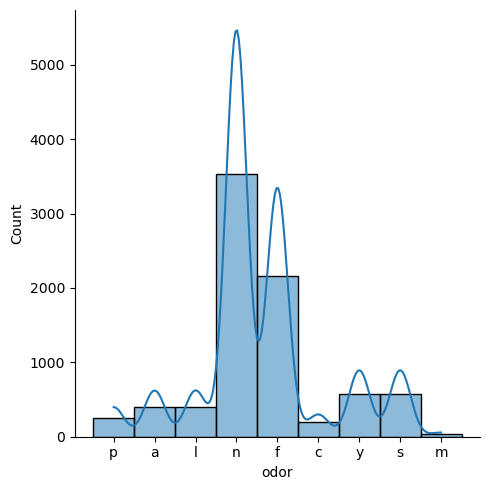

In [18]:
sns.displot(data = df , x='odor' , kde = True )